In [ ]:
install.packages('ISwR')
install.packages("sandwich")
install.packages('strucchange')
install.packages('lmtest')
install.packages('gap')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ISwR)
library (strucchange)
library(sandwich)
library(lmtest)
library(ggplot2)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



## Задание 1 
Оценить коэффициент корреляции Пирсона между двумя переменными в столбцах. Построить линейную регрессию. Проверить адекватность модели с помощью критерия Фишера. Построить прогноз на 3 значения и их доверительные интервалы. 
## Задание 2 
Провести на данных тест Чоу. Построить первую и вторую оценки для модели. 
## Задание 3 
Определить наличие гетероскедастичности с помощью метода Голдфельда-Квандта. 

In [ ]:
first <- read.table('1.txt', header = FALSE, sep = ",", dec = ".")
second <- read.table('2.txt', header = FALSE, sep = ",", dec = ".")
third <- read.table('3.txt', header = FALSE, sep = ",", dec = ".")

In [ ]:
cor.test(first$V1,first$V2)


	Pearson's product-moment correlation

data:  first$V1 and first$V2
t = -66.208, df = 98, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9926023 -0.9836750
sample estimates:
       cor 
-0.9890057 


In [ ]:
dov<-cor.test(first$V1,first$V2, method = "pearson") 
dov$conf.int # это можно не трогать, а вставить скрин чуть выше

[1] -0.9926023 -0.9836750
attr(,"conf.level")
[1] 0.95

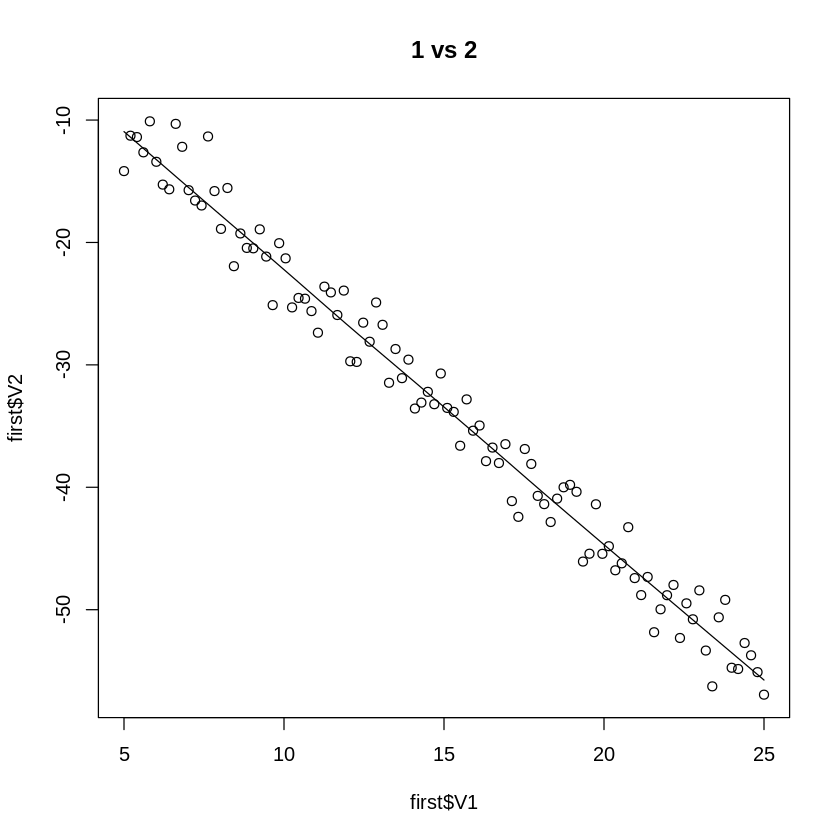

In [ ]:
scatter.smooth(first$V1,first$V2, main='1 vs 2')

In [ ]:
summary(lm(first$V2~first$V1))


Call:
lm(formula = first$V1 ~ first$V2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7525 -0.5395 -0.1003  0.5899  2.2106 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.491012   0.235821   2.082   0.0399 *  
first$V2    -0.434257   0.006559 -66.208   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8711 on 98 degrees of freedom
Multiple R-squared:  0.9781,	Adjusted R-squared:  0.9779 
F-statistic:  4383 on 1 and 98 DF,  p-value: < 2.2e-16


In [ ]:
lm_1 <- lm(first$V2~first$V1)
p1 <- lm_1$coefficients[2]* (first$V1[100] + mean(diff(first$V1))) + lm_1$coefficients[1]
p2 <- lm_1$coefficients[2]* (first$V1[100] + 2*mean(diff(first$V1))) + lm_1$coefficients[1]
p3 <- lm_1$coefficients[2]* (first$V1[100] + 3*mean(diff(first$V1))) + lm_1$coefficients[1]


In [ ]:
alpha <- 0.05
f_101 <- first
f_101[nrow(f_101) + 1,] <- c(f_101$V1[100] + mean(diff(first$V1)), p1)
n <- nrow(f_101)
t <- qt(1-alpha/2, n - 2)
S <- sqrt(sum((first$V2 - lm_1$fitted.values)^2)/(n - 2))
sqr <- sqrt(1 + 1/n + ((first$V1[100] + mean(diff(first$V1)) - mean(first$V1))^2)/(n*sd(first$V1)^2))
E1 <- S * t * sqr
paste('(',round(f_101$V2[101], 4), '-', round(E1,4), ';', round(f_101$V2[101],4), '+',round(E1,4),')')


[1] "( 25.202 - 3.994 ; 25.202 + 3.994 )"

In [ ]:
f_102 <- f_101
f_102[nrow(f_102) + 1,] <- c(f_102$V1[101] + mean(diff(first$V1)), p2)
sqr <- sqrt(1 + 1/n + ((f_102$V1[101] + mean(diff(first$V1)) - mean(f_102$V1))^2)/(n*sd(f_102$V1)^2))
E2 <- S * t * sqr
paste('(',round(f_102$V2[102], 4), '-', round(E2,4), ';', round(f_102$V2[102],4), '+',round(E2,4),')')


[1] "( 25.404 - 3.9917 ; 25.404 + 3.9917 )"

In [ ]:
f_103 <- f_102
f_103[nrow(f_103) + 1,] <- c(f_103$V1[102] + mean(diff(first$V1)), p3)
sqr <- sqrt(1 + 1/n + ((f_103$V1[103] + mean(diff(first$V1)) - mean(f_103$V1))^2)/(n*sd(f_103$V1)^2))
E3 <- S * t * sqr
paste('(',round(f_103$V2[103], 4), '-', round(E3,4), ';', round(f_103$V2[103],4), '+',round(E3,4),')')


[1] "( 25.6061 - 3.9939 ; 25.6061 + 3.9939 )"

In [ ]:
var.test(first$V1,first$V2)


	F test to compare two variances

data:  first$V1 and first$V2
F = 0.1928, num df = 99, denom df = 99, p-value = 7.977e-15
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1297206 0.2865386
sample estimates:
ratio of variances 
         0.1927951 


In [ ]:
m2_1 = lm(second$V4 ~ second$V1)
summary(m2_1)
m2_2 = lm(second$V4 ~ second$V1)
summary(m2_2) #вообще бесполезная фигня))


Call:
lm(formula = second$V4 ~ second$V1)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1809  -6.7447  -0.7324   6.9018  11.2235 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.46762    1.38377   0.338    0.736    
second$V1    0.49864    0.08598   5.799  2.6e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.091 on 198 degrees of freedom
Multiple R-squared:  0.1452,	Adjusted R-squared:  0.1409 
F-statistic: 33.63 on 1 and 198 DF,  p-value: 2.6e-08



Call:
lm(formula = second$V4 ~ second$V1)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1809  -6.7447  -0.7324   6.9018  11.2235 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.46762    1.38377   0.338    0.736    
second$V1    0.49864    0.08598   5.799  2.6e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.091 on 198 degrees of freedom
Multiple R-squared:  0.1452,	Adjusted R-squared:  0.1409 
F-statistic: 33.63 on 1 and 198 DF,  p-value: 2.6e-08


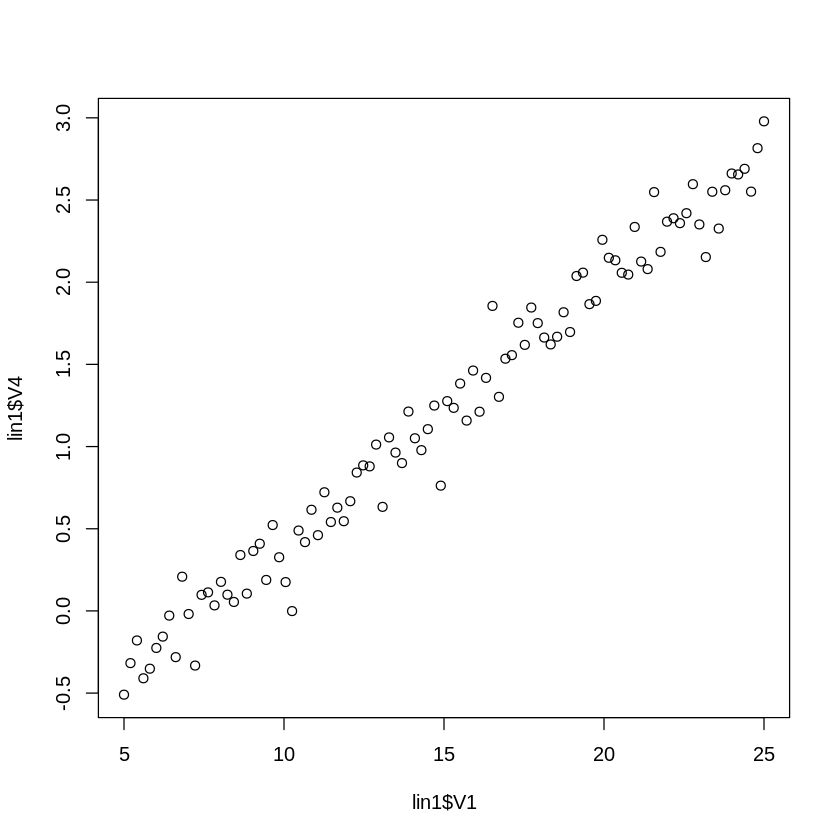

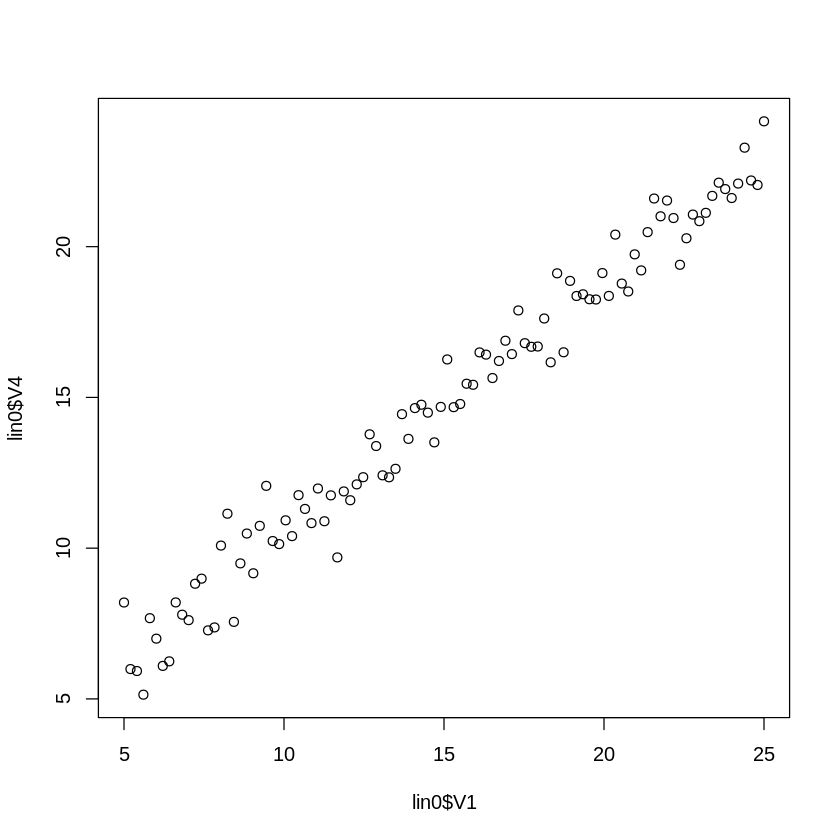

In [ ]:
lin1 <- second[second$V2 == 1,]
lin0 <- second[second$V2 == 0,]
plot(lin1$V1, lin1$V4)
plot(lin0$V1, lin0$V4)

F value         d.f.1         d.f.2       P value 
 1.344273e+04  2.000000e+00  1.960000e+02 1.734676e-210

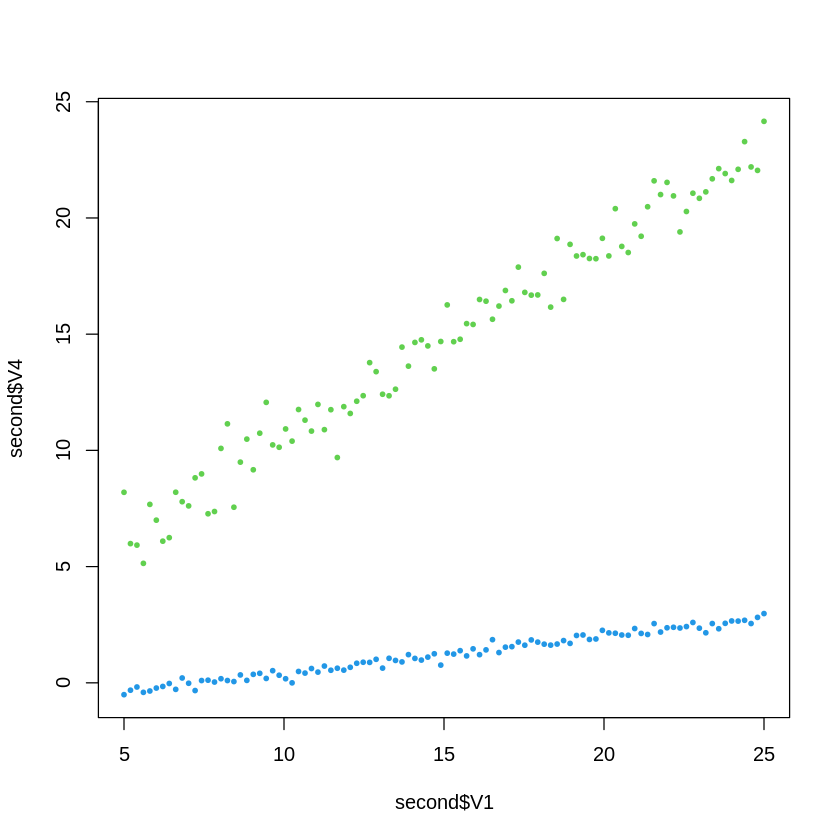

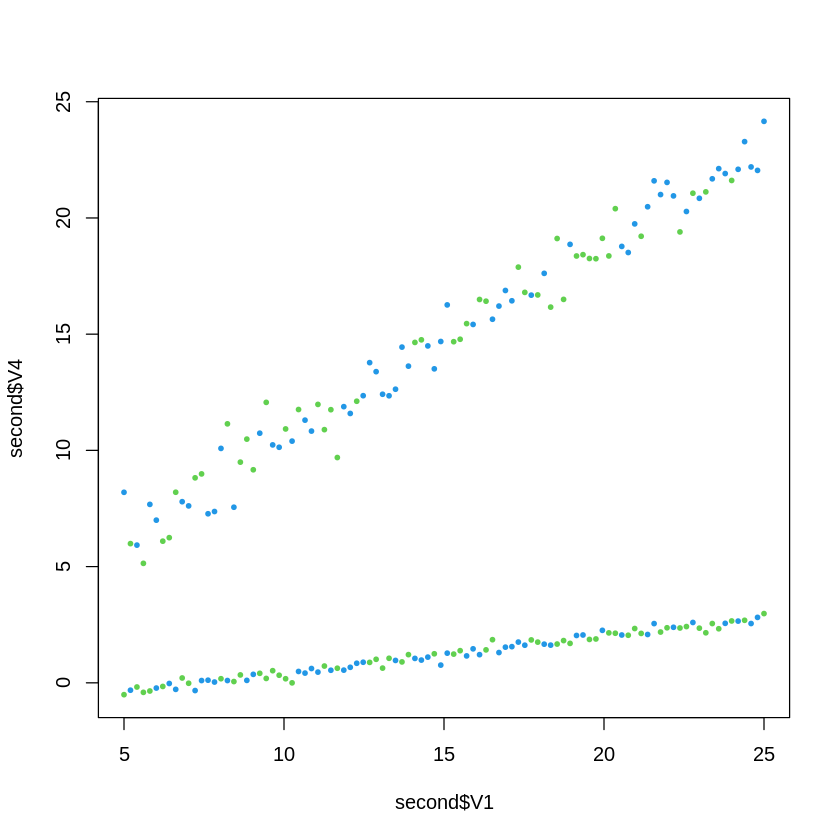

In [ ]:
gap::chow.test(lin1$V4, lin1$V1, lin0$V4, lin0$V1)
plot(second$V1, second$V4, col = second$V2 + 3, pch = 19, cex = I(0.5))
plot(second$V1, second$V4, col = second$V3 + 3, pch = 19, cex = I(0.5))

In [ ]:
nil1 <- lm(lin1$V4~lin1$V1)
nil0 <- lm(lin0$V4~lin0$V1)
summary(nil1)
summary(nil0)


Call:
lm(formula = lin1$V4 ~ lin1$V1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44206 -0.09619  0.00753  0.09863  0.41296 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.19884    0.04104  -29.21   <2e-16 ***
lin1$V1      0.15995    0.00255   62.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1487 on 98 degrees of freedom
Multiple R-squared:  0.9757,	Adjusted R-squared:  0.9754 
F-statistic:  3934 on 1 and 98 DF,  p-value: < 2.2e-16



Call:
lm(formula = lin0$V4 ~ lin0$V1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.21014 -0.53443 -0.03504  0.62865  2.11525 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.13408    0.23305   9.157 8.17e-15 ***
lin0$V1      0.83732    0.01448  57.821  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8445 on 98 degrees of freedom
Multiple R-squared:  0.9715,	Adjusted R-squared:  0.9712 
F-statistic:  3343 on 1 and 98 DF,  p-value: < 2.2e-16


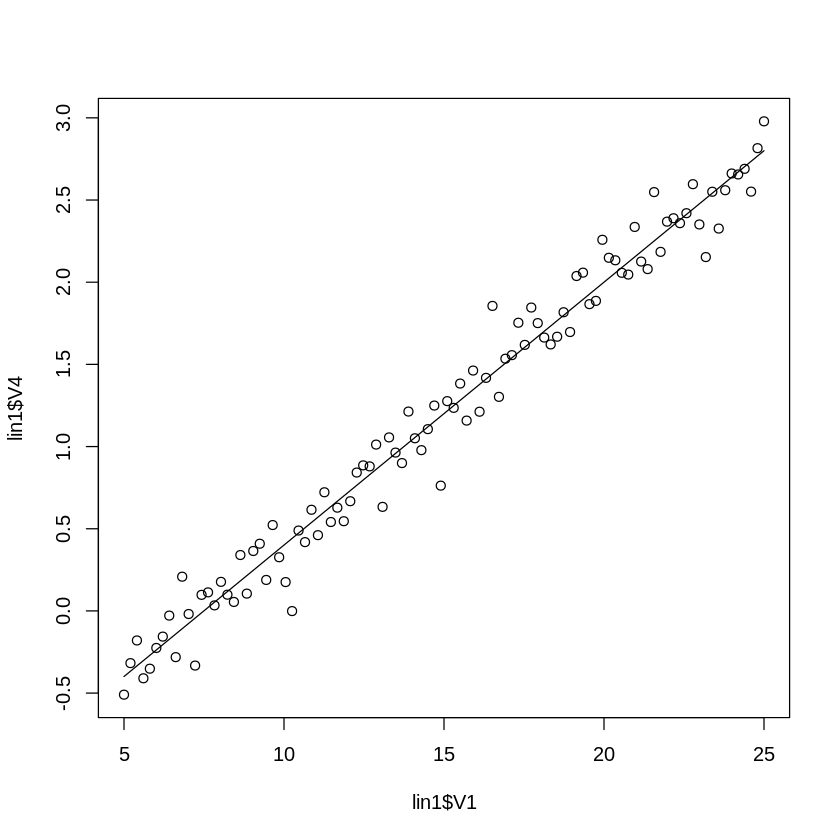

In [ ]:
plot(lin1$V1,lin1$V4)
lines(lin1$V1, predict(nil1))

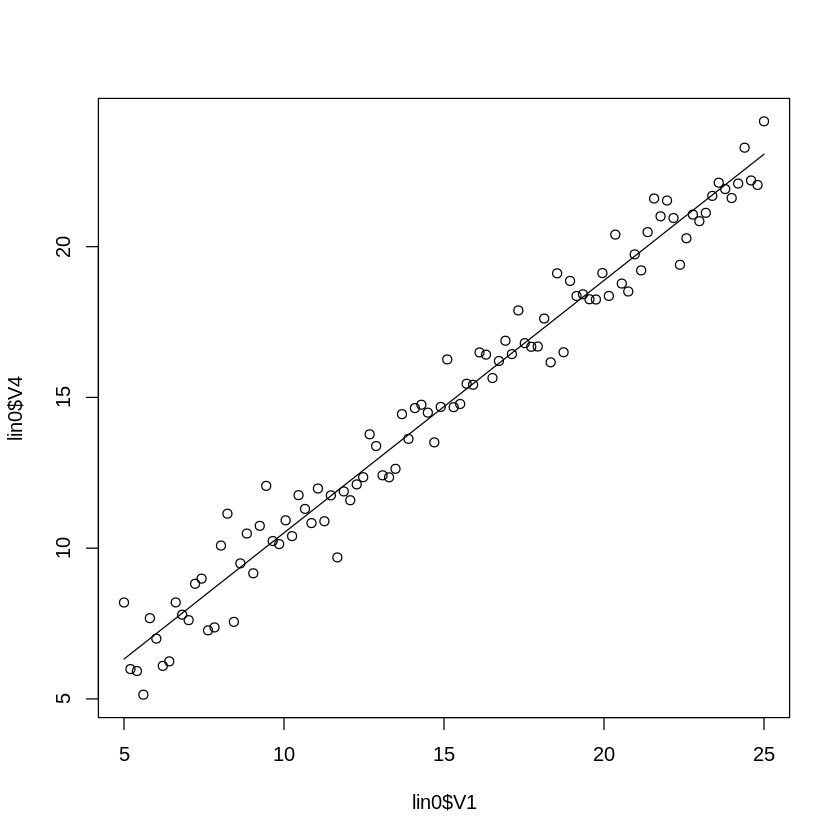

In [ ]:
plot(lin0$V1,lin0$V4)
lines(lin0$V1, predict(nil0))


	Goldfeld-Quandt test

data:  m3
GQ = 3.8481, df1 = 38, df2 = 38, p-value = 3.37e-05
alternative hypothesis: variance increases from segment 1 to 2


Warning message:
“Use of `third$V1` is discouraged.
ℹ Use `V1` instead.”
Warning message:
“Use of `third$V2` is discouraged.
ℹ Use `V2` instead.”



	Spearman's rank correlation rho

data:  third$V1 and third$V2
S = 108652, p-value = 0.0004197
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3480228 


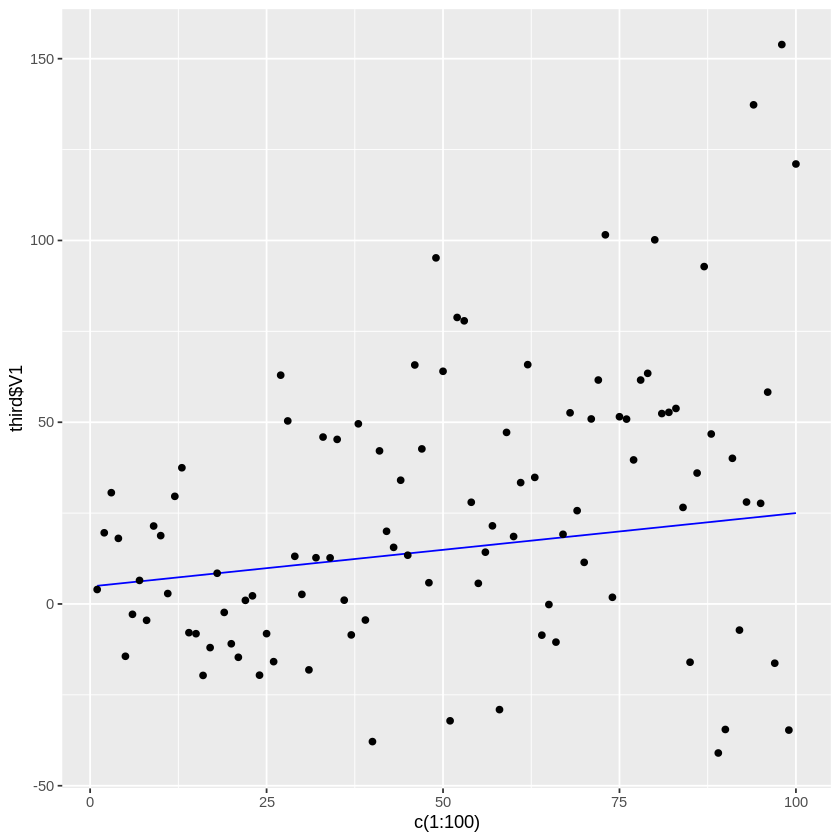

In [ ]:
m3 <- lm(third$V2~third$V1) 
gqtest(m3, fraction = 0.2)
ggplot(data = third) + 
  geom_line(mapping = aes(x = c(1:100), y = third$V1), col = 'blue') +
  geom_point(mapping = aes(x = c(1:100), y = third$V2))
cor.test(third$V1, third$V2, method = 'spearman')